In [1]:
%matplotlib inline
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.integrate
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
#plt.style.use('seaborn-pastel')
#plt.style.use('classic')

Welcome to JupyROOT 6.18/04


In [2]:
ifile = ROOT.TFile.Open("combined.root","READ")
tree = ifile.Get("Data")

factor = 2/15.3034
x431 = np.array([])
pt2431 = np.array([])
x411 = np.array([])
pt2411 = np.array([])
x431bar = np.array([])
pt2431bar = np.array([])
x411bar = np.array([])
pt2411bar = np.array([])
for i in range (0,tree.GetEntries()):
    tree.GetEntry(i)
    if getattr(tree,"id")==411:
        x411 = np.append(x411,getattr(tree,"pz")*factor)
        pt2411 = np.append(pt2411,pow(getattr(tree,"pt"),2))
    if getattr(tree,"id")==431:
        x431 = np.append(x431,getattr(tree,"pz")*factor)
        pt2431 = np.append(pt2431,pow(getattr(tree,"pt"),2))
    if getattr(tree,"id")==-411:
        x411bar = np.append(x411bar,getattr(tree,"pz")*factor)
        pt2411bar = np.append(pt2411bar,pow(getattr(tree,"pt"),2))
    if getattr(tree,"id")==-431:
        x431bar = np.append(x431bar,getattr(tree,"pz")*factor)
        pt2431bar = np.append(pt2431bar,pow(getattr(tree,"pt"),2))

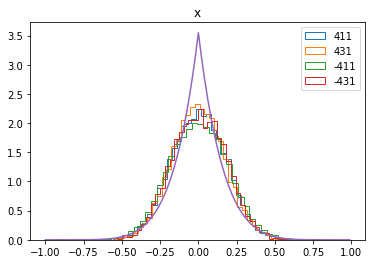

a-411 best_vals:[15.2431907]
a-431 best_vals:[17.00962771]


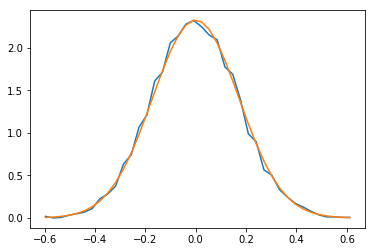

a-411bar best_vals:[13.01188698]
a-431bar best_vals:[15.06306367]


In [3]:
nbins= 40
plt.hist(x411, bins=nbins, histtype="step", density=True, label='411')
plt.hist(x431, bins=nbins, histtype="step", density=True, label='431')
plt.hist(x411bar, bins=nbins, histtype="step", density=True, label='-411')
plt.hist(x431bar, bins=nbins, histtype="step", density=True, label='-431')
n = 6.1
sigma = lambda x: ((n+1)/2)*pow(1-abs(x),n)
x = np.arange(-1,1,0.01)
plt.plot(x,sigma(x))
a = 14
gauss1 = lambda x: np.sqrt(a/np.pi)*np.exp(-a*x*x)
#plt.plot(x,gauss1(x))
#plt.yscale("log")
#plt.xscale("log")
plt.title('x')
plt.legend(loc="upper right")
plt.savefig("01.png")
plt.show()

#definir funcion gausseana
def gaussian(x, expo):
    return np.sqrt(expo/np.pi) * exp(-expo*(x)**2)

#ajustar data
idata = x411
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
#imprimir fit
print('a-411 best_vals:'+format(best_vals))
#plotear data+ajuste
#plt.plot(x,y)
#plt.plot(x,gaussian(x, best_vals[0]))
#plt.show()

#ajustar data
idata = x431
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
#imprimir fit
print('a-431 best_vals:'+format(best_vals))
#plotear data+ajuste
plt.plot(x,y)
plt.plot(x,gaussian(x, best_vals[0]))
plt.savefig("a431.png")
plt.show()

#ajustar data
idata = x411bar
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
#imprimir fit
print('a-411bar best_vals:'+format(best_vals))
#plotear data+ajuste
#plt.plot(x,y)
#plt.plot(x,gaussian(x, best_vals[0]))
#plt.show()

#ajustar data
idata = x431bar
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
#imprimir fit
print('a-431bar best_vals:'+format(best_vals))
#plotear data+ajuste
#plt.plot(x,y)
#plt.plot(x,gaussian(x, best_vals[0]))
#plt.show()

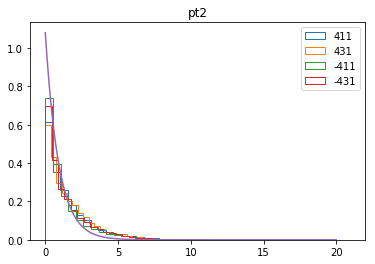

b-411 best_vals:[0.7020441]
b-431 best_vals:[0.63689258]


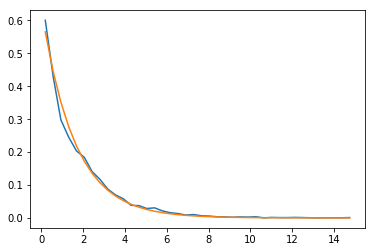

b-411bar best_vals:[0.93094615]
b-431bar best_vals:[0.79188959]


In [4]:
plt.hist(pt2411, bins=nbins, histtype="step", density=True, label='411')
plt.hist(pt2431, bins=nbins, histtype="step", density=True, label='431')
plt.hist(pt2411bar, bins=nbins, histtype="step", density=True, label='-411')
plt.hist(pt2431bar, bins=nbins, histtype="step", density=True, label='-431')
b=1.08
sigma2 = lambda x: b*np.exp(-b*x)
x2 = np.arange(0,20,0.01)
plt.plot(x2,sigma2(x2))
#plt.xscale("log")
#plt.yscale("log")
plt.title('pt2')
plt.legend(loc="upper right")
plt.savefig("02.png")
plt.show()

#definir funcion exponencial
def expo1(x, expo):
    return expo * exp(-expo*x)

#ajustar data
idata = pt2411
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(expo1, x, y, p0=init_vals)
#imprimir fit
print('b-411 best_vals:'+format(best_vals))
#plotear data+ajuste
#plt.plot(x,y)
#plt.plot(x,expo1(x, best_vals[0]))
#plt.show()

#ajustar data
idata = pt2431
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(expo1, x, y, p0=init_vals)
#imprimir fit
print('b-431 best_vals:'+format(best_vals))
#plotear data+ajuste
plt.plot(x,y)
plt.plot(x,expo1(x, best_vals[0]))
plt.savefig("b431.png")
plt.show()

#ajustar data
idata = pt2411bar
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(expo1, x, y, p0=init_vals)
#imprimir fit
print('b-411bar best_vals:'+format(best_vals))
#plotear data+ajuste
#plt.plot(x,y)
#plt.plot(x,expo1(x, best_vals[0]))
#plt.show()

#ajustar data
idata = pt2431bar
hist, bins = np.histogram(idata, bins = 40)
x = (bins[:-1]+bins[1:])/2
y = hist/(bins[1]-bins[0])/len(idata)
init_vals = 1  # for [amp, cen, wid]
best_vals, covar = curve_fit(expo1, x, y, p0=init_vals)
#imprimir fit
print('b-431bar best_vals:'+format(best_vals))
#plotear data+ajuste
#plt.yscale("log")
#plt.plot(x,y)
#plt.plot(x,expo1(x, best_vals[0]))
#plt.show()

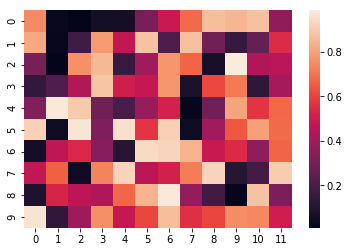

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0)
plt.show()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Define numbers of generated data points and bins per axis.
N_bins = 100

x = x411
y = pt2411


# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(x, y, bins=N_bins, normed=True, cmap='plasma',range=[[-0.6,0.6],[0,10]])

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('x ')
plt.ylabel('pt2')

# Show the plot.
plt.show()
plt.imshow()

In [ ]:
z = np.array([x,y])
print x
z.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(z, cmap='hot', interpolation='bilinear')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((5, 5))
print a
print a.shape

plt.imshow(a, cmap='hot', interpolation='bilinear')
plt.show()

In [ ]:
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

xedges = [0, 1, 3, 5]
yedges = [0, 2, 3, 4, 6]

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(133, title='NonUniformImage: interpolated', aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
im = NonUniformImage(ax, interpolation='bilinear')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
im.set_data(xcenters, ycenters, H)
im.plt()
#ax.images.append(im)
plt.show()

In [ ]:
#https://matplotlib.org/3.1.3/gallery/images_contours_and_fields/image_nonuniform.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib import cm

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9)

# Highly nonlinear x array:
x2 = x**3

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2)

fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
fig.suptitle('NonUniformImage class', fontsize='large')
ax = axs[0, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)

interp = 'bilinear'

ax = axs[0, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title(interp)



plt.show()